In [35]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import nrrd

In [121]:
data_path = "3D_DATA"

In [122]:
num_files = len([f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))])
print("Number of files in folder:", num_files)

Number of files in folder: 124


In [123]:
def parse(folder):
    image_files = []
    label_files = []

    for file_name in os.listdir(folder):
        # Check if the file is an image or label file
        if file_name.endswith(".img.nrrd"):
            image_files.append(file_name)
        elif file_name.endswith(".seg.nrrd"):
            label_files.append(file_name)

    # Sort the lists of files to ensure a consistent order
    image_files.sort()
    label_files.sort()

    # Loop through the files and append them to separate lists based on size
    for i in range(len(image_files)):
        image_path = os.path.join(folder, image_files[i])
        label_path = os.path.join(folder, label_files[i])
    
        size1 = os.path.getsize(image_path)
        size2 = os.path.getsize(label_path)
    
        if size1 < size2:
            label_files[i], image_files[i] = image_files[i], label_files[i]
            
    return image_files, label_files


In [124]:
image_files, label_files = parse(data_path)

In [125]:
print(image_files[31])

52.img.nrrd


In [117]:
def pad(image, label):
    maxX = 512
    maxY = 512
    maxZ = 384
    slicecount = 0
    
    padded_images = np.zeros((slicecount, maxY, maxX, maxZ), dtype=image[0].dtype)
    padded_labels = np.zeros((slicecount, maxY, maxX, maxZ), dtype=label[0].dtype)

    img = image
    lbl = label
        
        # Calculate the amount of padding needed
    pad_x = maxX - img.shape[1]
    pad_y = maxY - img.shape[0]
    pad_z = maxZ - img.shape[2]

        
        # Pad the image and label
    padded_img = np.pad(img, ((0, pad_y), (0, pad_x), (0, pad_z)), 'constant')
    padded_lbl = np.pad(lbl, ((0, pad_y), (0, pad_x), (0, pad_z)), 'constant')
    padded_images = padded_img
    padded_labels = padded_lbl
        
    return padded_images, padded_labels


In [84]:
print(image[3])

14.img.nrrd


In [95]:
label_with_header = nrrd.read(data_path + '/' + label_files[1])
image_with_header = nrrd.read(data_path + '/' + image_files[1])
label = label_with_header[0]
image = image_with_header[0]
padded_image, padded_label = pad(image, label)
nrrd.write('Image_'+str(0)+'.nrrd', padded_image)
nrrd.write('Label_'+str(0)+'.nrrd', padded_label)

-----------------------
0
162
-----------------------
[[[-1010 -1008  -998 ...     0     0     0]
  [-1010 -1012  -996 ...     0     0     0]
  [-1008 -1014  -995 ...     0     0     0]
  ...
  [ -789  -787  -802 ...     0     0     0]
  [ -613  -589  -582 ...     0     0     0]
  [ -361  -344  -343 ...     0     0     0]]

 [[ -999 -1015 -1008 ...     0     0     0]
  [-1009 -1016 -1006 ...     0     0     0]
  [-1011 -1016 -1005 ...     0     0     0]
  ...
  [ -806  -807  -816 ...     0     0     0]
  [ -681  -663  -661 ...     0     0     0]
  [ -458  -451  -445 ...     0     0     0]]

 [[ -991 -1013 -1013 ...     0     0     0]
  [-1002 -1014 -1010 ...     0     0     0]
  [-1011 -1015 -1005 ...     0     0     0]
  ...
  [ -797  -815  -809 ...     0     0     0]
  [ -736  -734  -731 ...     0     0     0]
  [ -570  -568  -562 ...     0     0     0]]

 ...

 [[-1001 -1004 -1000 ...     0     0     0]
  [-1001 -1004  -994 ...     0     0     0]
  [-1000 -1006  -998 ...     0     0

In [126]:
def read_files(image_files, label_files):
    for i in range(31, 62):
        label_with_header = nrrd.read(data_path + '/' + label_files[i])
        image_with_header = nrrd.read(data_path + '/' + image_files[i])
        label = label_with_header[0]
        image = image_with_header[0]
        padded_image, padded_label = pad(image, label)
        print('File: ' + str(i))
        nrrd.write('paddedImagesESUS/Image_' + str(i) + '.nrrd', padded_image)
        nrrd.write('paddedImagesESUS/Label_' + str(i) + '.nrrd', padded_label)

In [120]:
print(image_files[31])

51.img.nrrd


In [109]:
len(image_files)

64

In [127]:
read_files(image_files, label_files)

File: 31
File: 32
File: 33
File: 34
File: 35
File: 36
File: 37
File: 38
File: 39
File: 40
File: 41
File: 42
File: 43
File: 44
File: 45
File: 46
File: 47
File: 48
File: 49
File: 50
File: 51
File: 52
File: 53
File: 54
File: 55
File: 56
File: 57
File: 58
File: 59
File: 60
File: 61


(512, 512, 384)


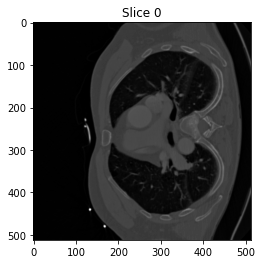

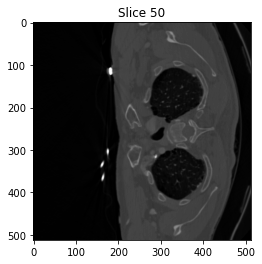

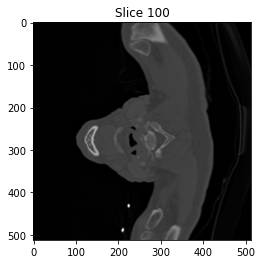

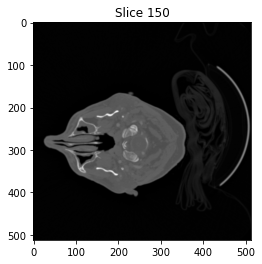

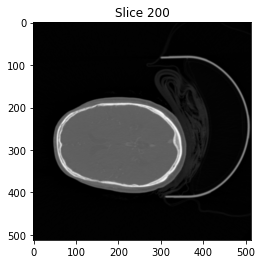

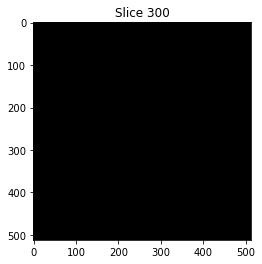

In [134]:
# Load the NRRD file
data, header = nrrd.read('paddedImagesESUS/Image_36.nrrd')

# Check the dimensions of the loaded image
print(data.shape)  # (512, 512, 384)

# View slices along the Z-axis (third dimension)
z_slices = [0, 50, 100, 150, 200, 300]
for z in z_slices:
    plt.imshow(data[:, :, z], cmap='gray')
    plt.title(f'Slice {z}')
    plt.show()
